### 偏差图 deviation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

·plt.hlines() #水平条形图
·plt.vlines() #垂直条形图

No handles with labels found to put in legend.


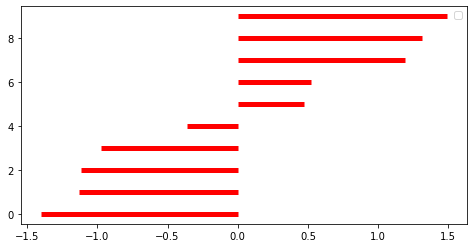

In [3]:
x = np.random.randn(10)
x.sort() #按顺序排列
x = x-x.mean()  #基于均值分为两部分
plt.figure(figsize =(8,4))
# 线宽、颜色
plt.hlines(y = range(10),xmin = 0,xmax = x,linewidth=5,color='red')
plt.legend()  #显示图例，标签
plt.show()

·两部分显示不同的颜色

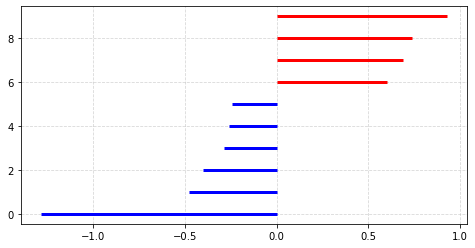

In [24]:
x = np.random.randn(10)
x.sort() #按顺序排列
x = x-x.mean()  #基于均值分为两部分
plt.figure(figsize =(8,4))
colors=[]
for i in x:  #x是大于0和小于0两部分
    if i>0:
        colors.append('red')
    else:
        colors.append('blue')
# 线宽、颜色
plt.hlines(y = range(10),xmin = 0,xmax = x,linewidth=3,color=colors)
plt.grid(linestyle='--',alpha=0.5)
#plt.legend()  #显示图例，标签
plt.show()

·颜色变化:  alpha饱和度

No handles with labels found to put in legend.


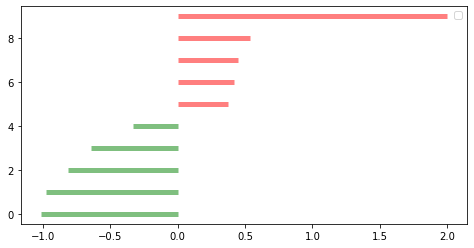

In [4]:
x = np.random.randn(10)
x.sort() #按顺序排列
x = x-x.mean()  #基于均值分为两部分
plt.figure(figsize =(8,4))
colors=[]
for i in x:  #x是大于0和小于0两部分
    if i>0:
        colors.append('red')
    else:
        colors.append('green')
# 线宽、颜色
plt.hlines(y = range(10),xmin = 0,xmax = x,linewidth=5,color=colors,alpha = 0.5)
plt.legend()  #显示图例，标签
plt.show()

In [7]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [8]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [9]:
df.shape

(32, 14)

In [10]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast', 'cars', 'carname'],
      dtype='object')

In [11]:
sum(df.cars==df.carname)  #两列全部相同

32

No handles with labels found to put in legend.


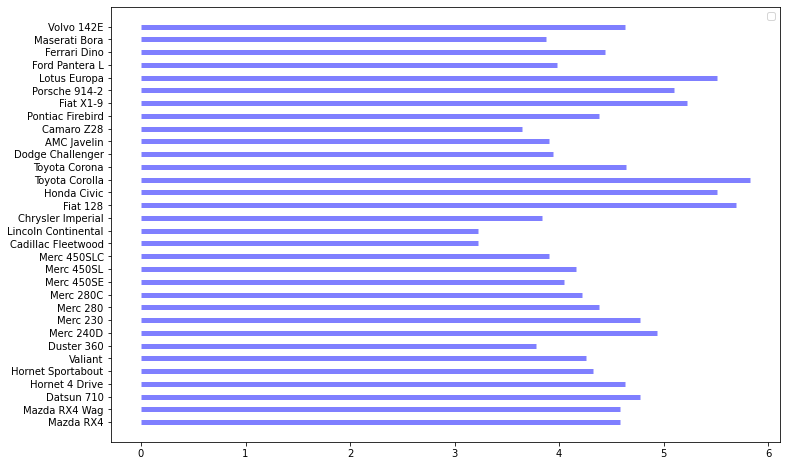

In [12]:
plt.figure(figsize=(12,8))

plt.hlines(y=df.cars,xmin=0,xmax=df.mpg,color='b',alpha=0.5,linewidth=5)

plt.legend()
plt.show()

#### 标准化处理数据

In [13]:
#提取mpg这一列的所有数据
x = df.loc[:,'mpg']
#标准化处理：z-score标准化 将均值变为0，标准差为1
df['mpg_z'] = (x -x.mean())/x.std()

In [14]:
df['mpg_z'].values

array([ 0.22356336,  0.22356336,  0.51451502,  0.2892649 , -0.16701545,
       -0.27280321, -0.98804909,  0.76363298,  0.51451502, -0.08014871,
       -0.32635469, -0.58244884, -0.41662005, -0.8108034 , -1.82997917,
       -1.82997917, -0.90860438,  1.9017698 ,  1.63181012,  2.0988105 ,
        0.30559411, -0.75289375, -0.8108034 , -1.19166439, -0.08014871,
        1.19516933,  1.00470849,  1.63181012, -0.69554186,  0.00559412,
       -0.84972785,  0.2892649 ])

#### 生成颜色标签

In [15]:
df['colors'] = ['red' if i>0 else 'green' for i in df['mpg_z']]

In [16]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0.223563,red
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0.223563,red
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0.514515,red
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0.289265,red
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,-0.167015,green


In [17]:
df['colors'].value_counts()

green    17
red      15
Name: colors, dtype: int64

·对数据进行排序

In [18]:
#对整个数据集进行排序
df.sort_values('mpg_z',inplace=True)

In [19]:
df.reset_index(drop = True,inplace = True)

In [20]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,green
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,green
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,green
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,green
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,green


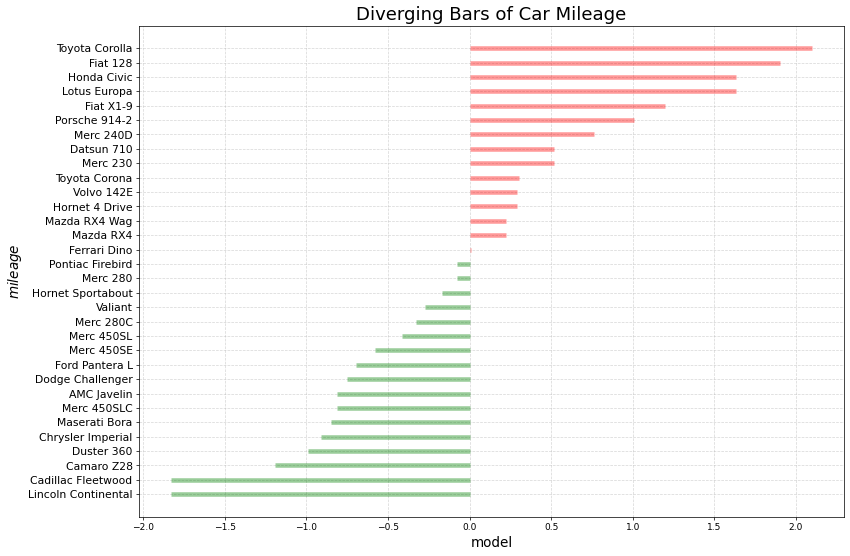

In [22]:
plt.figure(figsize=(14,10),dpi=65)
plt.hlines(y=df.cars,xmin=0,xmax=df.mpg_z,color=df.colors,alpha=0.4,linewidth=5)

plt.xlabel('model',fontsize=15)
plt.ylabel('$mileage$',fontsize=15)
plt.yticks(fontsize=12)
plt.title('Diverging Bars of Car Mileage',fontsize=20)
plt.grid(linestyle='--',alpha=0.5)

In [10]:
df['label'] = [1 if i=='red' else 0 for i in df.colors]

NameError: name 'df' is not defined

In [ ]:
df.head()

### 利用Kmeans算法对原数据集进行聚类

In [11]:
from sklearn.cluster import KMeans

In [12]:
df1 = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

In [ ]:
#提取目标数据，由于sklearn只接受二维数据，所以需要对目标数据进行变形
data_x = df1.mpg.values.reshape(-1,1)

In [ ]:
#执行聚类
cluster = KMeans(n_clusters=2,random_state=0).fit(data_x)

In [ ]:
#查看聚好的类，每个样本所对应的类
cluster.labels_

### 绘制文本函数

Text([0.01704512], [0.8758416], 'text')

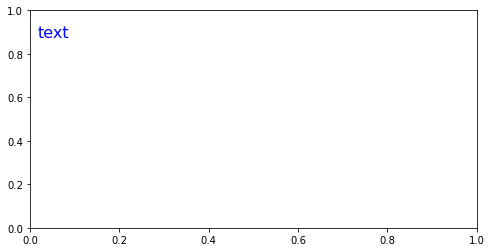

In [13]:
x = np.random.rand(1)
y = np.random.rand(1)
plt.figure(figsize=(8,4))
#一次只能标注一个位置的文本
plt.text(x,y,'text',fontdict={'size':16,'color':'b'})

In [ ]:
plt.figure(figsize=(12,10),dpi=65)
plt.hlines(y=df.cars,xmin=0,xmax=df.mpg_z)

for i in range(df.shape[0]):#遍历每条数据
    x = df.mpg_z[i]
    y = df.index[i]
    s = str(round(df.mpg_z[i],2))